In [1]:
# define constants
input_dataset_parent_path = '/home/vamshikrishnadude/Downloads/Driving-range-Prediction-and-Energy-Consumption-in-EV-s/input_dataset/'
path_to_stage0_csv = input_dataset_parent_path+ 'preprocessed_stage0.csv'

In [2]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

import os
from IPython.core.display import display

In [3]:
df = pd.read_csv(path_to_stage0_csv);
display(df.head(5))

,trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
0,50.0,12.29,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
1,43.0,8.68,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
2,44.0,1.50,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
3,76.0,14.44,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2
4,15.0,6.84,Winter tires,1,0,0,Normal,16.1,0,1,23.0,-0.7


# Univariate Analysis

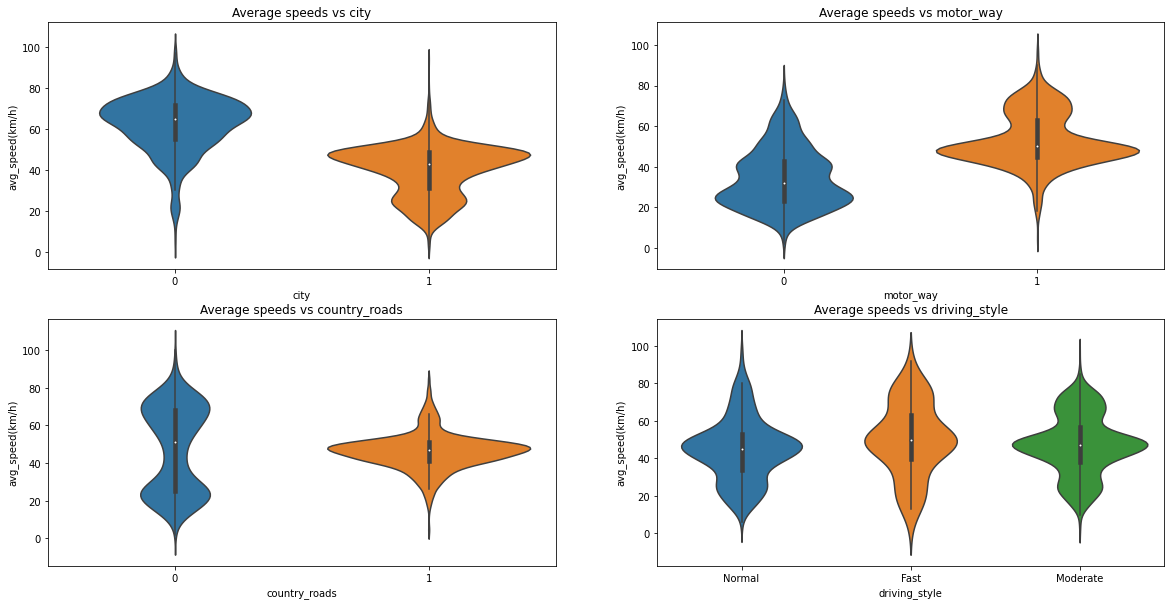

In [10]:
#plt.title("Average speeds distribution among city, motor_way, driving style, country_roads")
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title("Average speeds vs city")
sb.violinplot(x = 'city', y = 'avg_speed(km/h)', data = df)

plt.subplot(2, 2, 2)
plt.title("Average speeds vs motor_way")
sb.violinplot(x = 'motor_way', y = 'avg_speed(km/h)', data = df)

plt.subplot(2, 2, 3)
plt.title("Average speeds vs country_roads")
sb.violinplot(x = 'country_roads', y = 'avg_speed(km/h)', data = df)

plt.subplot(2, 2, 4)
plt.title("Average speeds vs driving_style")
sb.violinplot(x = 'driving_style', y = 'avg_speed(km/h)', data = df)

plt.show()

**Observation**
* InterQuartile Range of Avg_speed is clearly separated among city's. City '0' have higher avg speeds.
* InterQuartile Range of Avg_speed is clearly separated among motor_way's. Motor_way '1' have higher avg speeds.
* avg speed range is widespread in countryroad '0' compare to '1'.

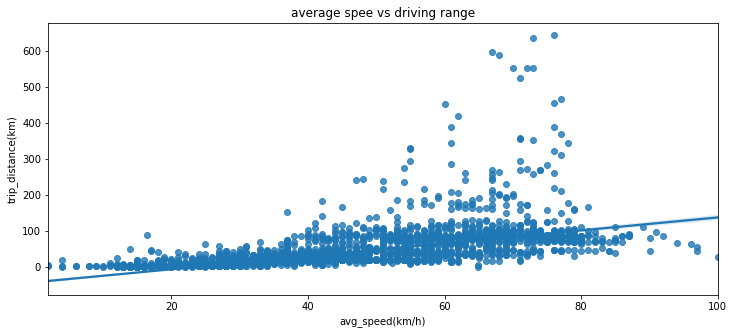

In [17]:
# role of avg_speed in driving_range
plt.figure(figsize=(12, 5))
plt.title("average spee vs driving range")
sb.regplot(x = 'avg_speed(km/h)', y = 'trip_distance(km)', data = df)
plt.show()

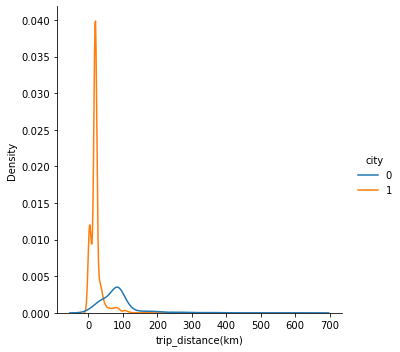

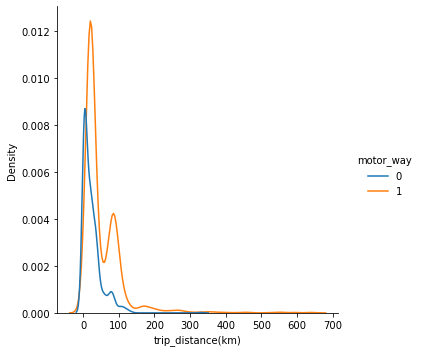

In [50]:
#plt.title("Average speeds distribution among city, motor_way, driving style, country_roads")

sb.displot(data=df, x="trip_distance(km)", kind='kde', hue='city')
sb.displot(data=df, x="trip_distance(km)", kind='kde', hue='motor_way')

**Observations**
* We can see data points having an upward trend till 80 km/hr, so the avg_speed will be a feature to consider for distance range.
* tripdistance is lower in city's 
* one way have larger distance distance ranges with more frequencies in (50 - 300 km). one way has more than 350km range.

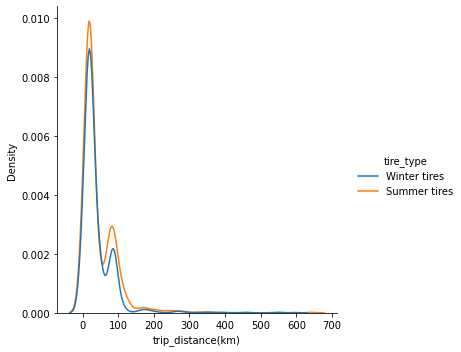

In [51]:
# tire_type on trip distance.
sb.displot(data=df, x="trip_distance(km)", kind='kde', hue='tire_type')

**Observation**
* trip distance distribution is same for all tire types. may be this is not a useful feature for predicting distance_range.

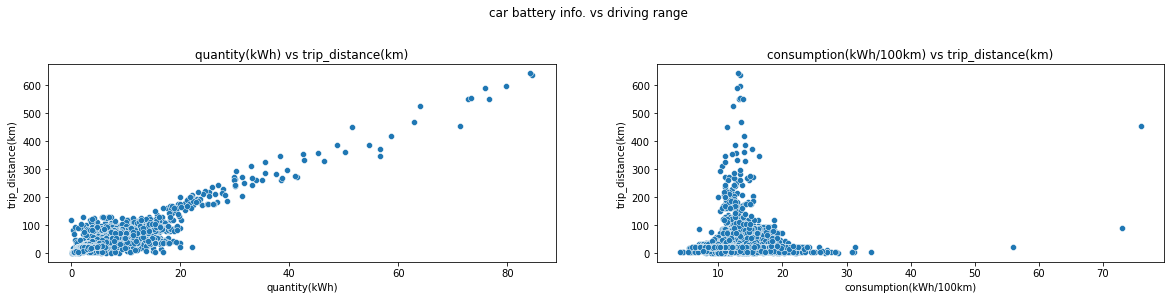

In [56]:
# Quantity on trip distance
plt.figure(figsize=(20, 8))
plt.suptitle("car battery info. vs driving range")
plt.subplot(2, 2, 1)
plt.title("quantity(kWh) vs trip_distance(km)")
sb.scatterplot(x = 'quantity(kWh)', y = 'trip_distance(km)', data = df)

plt.subplot(2, 2, 2)
plt.title("consumption(kWh/100km) vs trip_distance(km)")
sb.scatterplot(x = 'consumption(kWh/100km)', y = 'trip_distance(km)', data = df)
plt.show()

**Observation**
* quantity above 20kwh is directly proportional to trip distance.
* quantity in range 0 to 20, maynot alone determine the trip distance, we need to combine some more features to determine the tripdistance for quantity kwh
* trip distance is higher in EV's having energy consumption range  in 10 to 20.

<AxesSubplot:title={'center':'consumption(kWh/100km) vs park_heating'}, xlabel='park_heating', ylabel='consumption(kWh/100km)'>

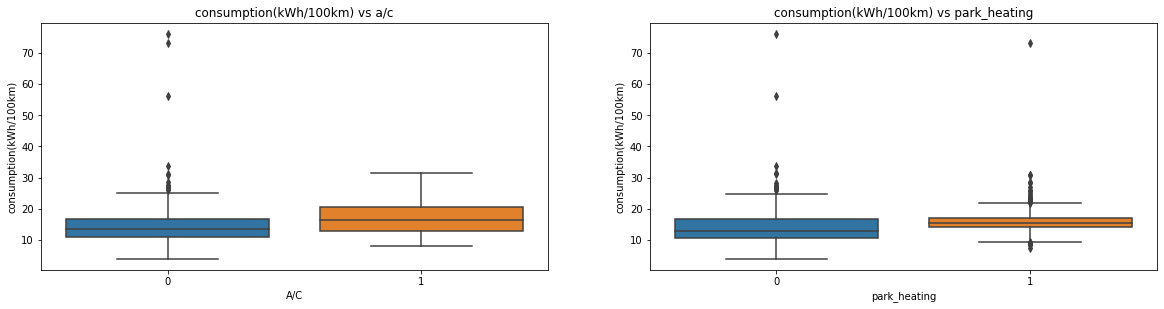

In [59]:
# a/c and park_heating in energy consumption

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title("consumption(kWh/100km) vs a/c")
sb.boxplot(x = 'A/C', y = 'consumption(kWh/100km)', data = df)

plt.subplot(2, 2, 2)
plt.title("consumption(kWh/100km) vs park_heating")
sb.boxplot(x = 'park_heating', y = 'consumption(kWh/100km)', data = df)

**Observations**
* The energy consumption levels are higher with A/C on and park heating (range is within no park_heating)comparatively.